In [27]:
'''
In above average stress group: Stress_score seems to predict feelin of tiredness /rested

Is it true at all?
'''

import pandas as pd
from utils import weekFromDate

# Stai file
stai = pd.read_csv('../dataset/stai.csv')

# Day file
day = pd.read_csv('../dataset/day.csv')

def filterDays(row, stai_row):
  week = weekFromDate(row['date'])
  id = row['id']
  stai_week = weekFromDate(stai_row['submitdate'])
  stai_id = stai_row['user_id']
  return week == stai_week and id == stai_id

# Calculate average stress score of the week and counting the amount of stressed / anxious emotions
for index, stai_row in stai.iterrows():
  # print(stai_row)

  this_day = day[day.apply(filterDays, axis=1, args=(stai_row,))]

  #Count averages and sums , doesnt work need to alter the original
  stai.at[ index, 'stress_score_avg' ] = this_day['stress_score'].mean()
  stai.at[ index, 'tense_count'] = this_day['TENSE/ANXIOUS'].sum()
  stai.at[ index, 'rested_count'] = this_day['RESTED/RELAXED'].sum()

#Show
stai



,Unnamed: 0.1,Unnamed: 0,user_id,type,submitdate,stai_stress,stai_stress_category,stress_score_avg,tense_count,rested_count
0,0,0,1,stai,2021-05-31,45.0,Below average,80.285714,1.0,0.0
1,1,1,1,stai,2021-06-07,46.0,Average,74.333333,0.0,0.0
2,2,3,1,stai,2021-07-19,46.0,Average,74.142857,0.0,1.0
3,3,4,1,stai,2021-07-26,46.0,Average,80.571429,0.0,0.0
4,4,5,1,stai,2021-06-28,54.0,Above average,73.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
274,274,0,71,stai,2021-06-08,60.0,Above average,81.000000,0.0,0.0
275,275,1,71,stai,2021-07-06,60.0,Above average,64.857143,0.0,0.0
276,276,2,71,stai,2021-06-01,59.0,Above average,65.714286,0.0,0.0
277,277,3,71,stai,2021-06-22,60.0,Above average,79.428571,0.0,0.0


In [28]:

filtered_stai = stai.copy()

#Filter missing stress scores and people who didn't report either tense or rested
filtered_stai = filtered_stai.dropna(subset=['stress_score_avg'])
filtered_stai = filtered_stai[ filtered_stai['stress_score_avg'] > 15 ] #Outlier
filtered_stai = filtered_stai[~((filtered_stai['tense_count'] == 0) & (filtered_stai['rested_count'] == 0))]

# Show
print(filtered_stai)

#Filter to the stai groups
stai_groups = [
  ('Above average', filtered_stai[ filtered_stai['stai_stress_category'] == 'Above average' ]),
  ('Average', filtered_stai[ filtered_stai['stai_stress_category'] == 'Average' ]),
  ('Below average', filtered_stai[ filtered_stai['stai_stress_category'] == 'Below average' ]),
]

     Unnamed: 0.1  Unnamed: 0  user_id  type  submitdate  stai_stress  \
0               0           0        1  stai  2021-05-31         45.0   
2               2           3        1  stai  2021-07-19         46.0   
7               7           3        2  stai  2022-01-07         42.0   
9               9           5        2  stai  2022-01-05         44.0   
10             10           6        2  stai  2022-01-10         38.0   
..            ...         ...      ...   ...         ...          ...   
267           267           3       69  stai  2021-06-07         49.0   
268           268           4       69  stai  2021-06-21         45.0   
269           269           5       69  stai  2021-06-28         45.0   
270           270           6       69  stai  2021-07-05         49.0   
271           271           7       69  stai  2021-07-20         49.0   

    stai_stress_category  stress_score_avg  tense_count  rested_count  
0          Below average         80.285714         

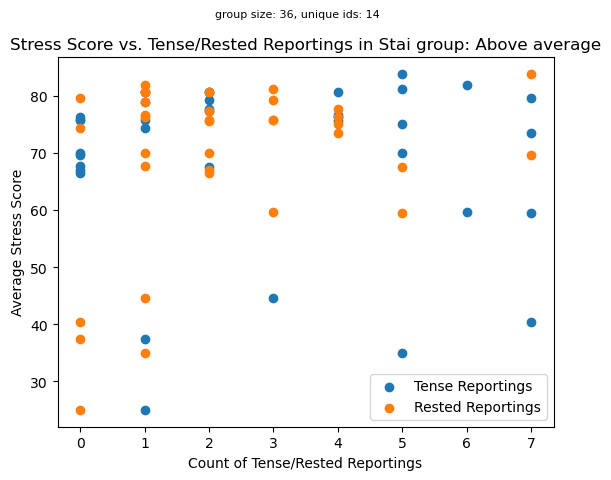

Tense ppl(n=7) avg stress_score: 72.42857142857143
Rested ppl(n=9) avg stress_score: 66.2063492063492


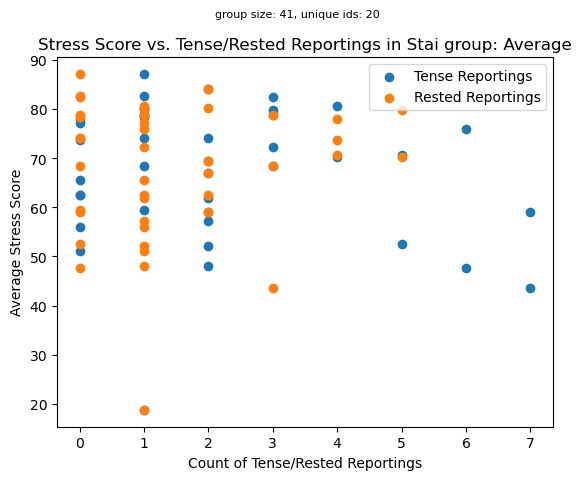

Tense ppl(n=4) avg stress_score: 73.58928571428571
Rested ppl(n=12) avg stress_score: 63.650396825396825


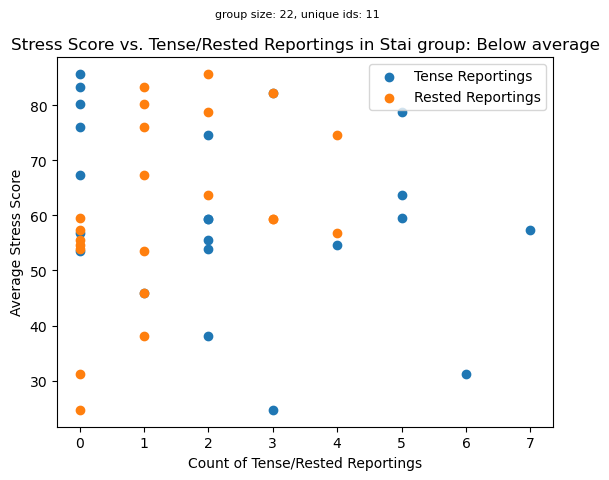

Tense ppl(n=2) avg stress_score: 71.25714285714285
Rested ppl(n=8) avg stress_score: 46.863095238095234


In [40]:
# Create the scatter plot
import matplotlib.pyplot as plt

for group_name, stai_group in stai_groups:
  # Assuming your data is stored in a pandas DataFrame called 'df'
  stress_score = stai_group['stress_score_avg']
  tense_reportings = stai_group['rested_count']
  rested_reportings = stai_group['tense_count']

  # Plot the scatter plot
  plt.scatter(tense_reportings, stress_score, label='Tense Reportings')
  plt.scatter(rested_reportings, stress_score, label='Rested Reportings')

  desc1 = 'group size: ' + str(stai_group.shape[0])
  desc2 = 'unique ids: ' + str(stai_group['user_id'].nunique())
  plt.suptitle( ', '.join([desc1, desc2]), fontsize=8 )

  # Set the labels and title of the plot
  plt.xlabel('Count of Tense/Rested Reportings')
  plt.ylabel('Average Stress Score')
  plt.title('Stress Score vs. Tense/Rested Reportings in Stai group: ' + group_name)

  # Add a legend
  plt.legend()
  
  # Display the plot
  plt.show()

  # See if there is difference in averages between tense vs rested people
  tense = stai_group[ ( stai_group['tense_count'] >= 2 ) & ( stai_group['rested_count'] < 2 ) ]
  print( 'Tense ppl(n=' + str(tense.shape[0]) + ') avg stress_score: ' + str(tense['stress_score_avg'].mean()) )
  rested = stai_group[ ( stai_group['rested_count'] >= 2 ) & ( stai_group['tense_count'] < 2 ) ]
  print( 'Rested ppl(n=' + str(rested.shape[0]) + ') avg stress_score: ' + str(rested['stress_score_avg'].mean()) )



Tense people do seem to report their feelings more or atleast the counts are more frequent

